In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_excel('/cardiovasculardata.xlsx')

In [ ]:
df.head()

,id,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,id,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72,120,80,2,1,0,0,1,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            70000 non-null  int64
 1   age           70000 non-null  int64
 2   gender        70000 non-null  int64
 3   height in cm  70000 non-null  int64
 4   weight in kg  70000 non-null  int64
 5   ap_hi         70000 non-null  int64
 6   ap_lo         70000 non-null  int64
 7   cholesterol   70000 non-null  int64
 8   gluc          70000 non-null  int64
 9   smoke         70000 non-null  int64
 10  alco          70000 non-null  int64
 11  active        70000 non-null  int64
 12  cardio        70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB
None


In [ ]:
print(df.describe())

                 id           age        gender  height in cm  weight in kg  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205543   
std    28851.302323   2467.251667      0.476838      8.210126     14.395829   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [ ]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
print(df[categorical_cols].astype('category').describe())

        gender  cholesterol   gluc  smoke   alco  active
count    70000        70000  70000  70000  70000   70000
unique       2            3      3      2      2       2
top          1            1      1      0      0       1
freq     45530        52385  59479  63831  66236   56261


In [ ]:
print(df['cardio'].value_counts(normalize=True))

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


In [ ]:
print(df.isnull().sum())

id              0
age             0
gender          0
height in cm    0
weight in kg    0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
dtype: int64


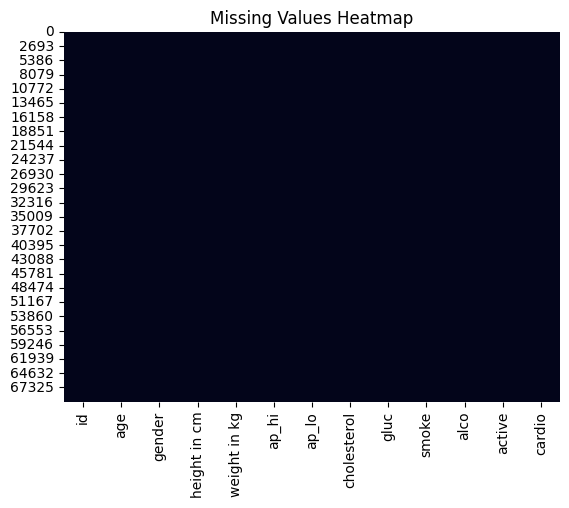

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
outlier_cols = ['age', 'height in cm', 'weight in kg', 'ap_hi', 'ap_lo']
for col in outlier_cols:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in age: 4
Outliers in height in cm: 519
Outliers in weight in kg: 1819
Outliers in ap_hi: 1435
Outliers in ap_lo: 4632


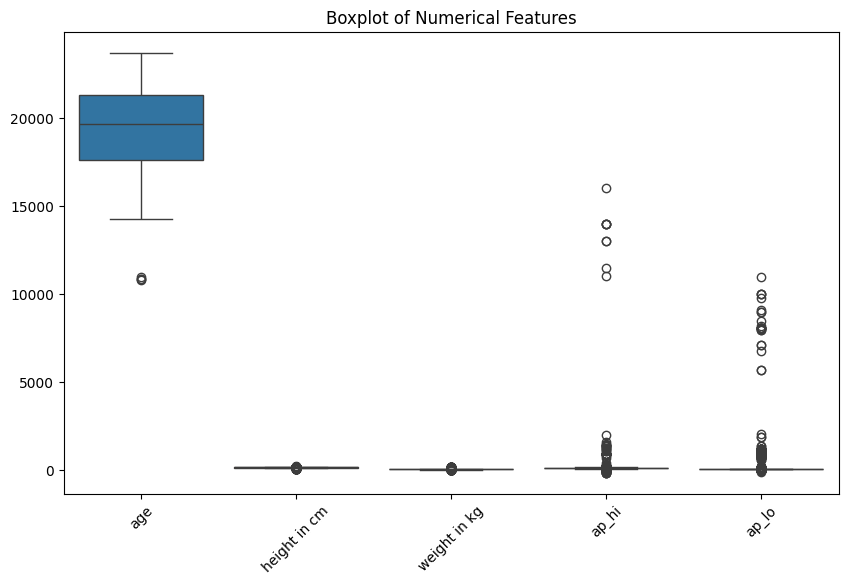

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[outlier_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

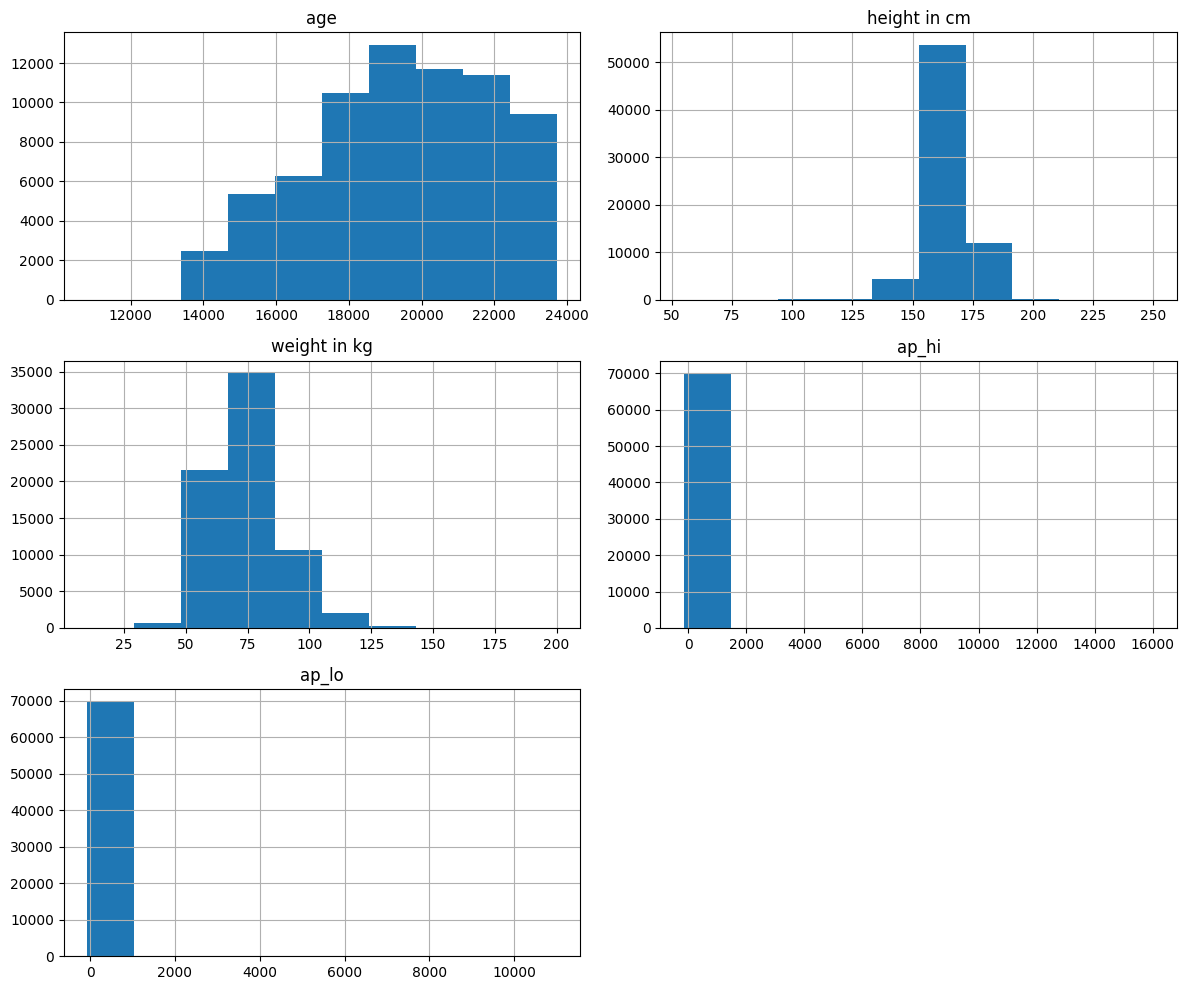

In [ ]:
numerical_cols = ['age', 'height in cm', 'weight in kg', 'ap_hi', 'ap_lo']
df[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

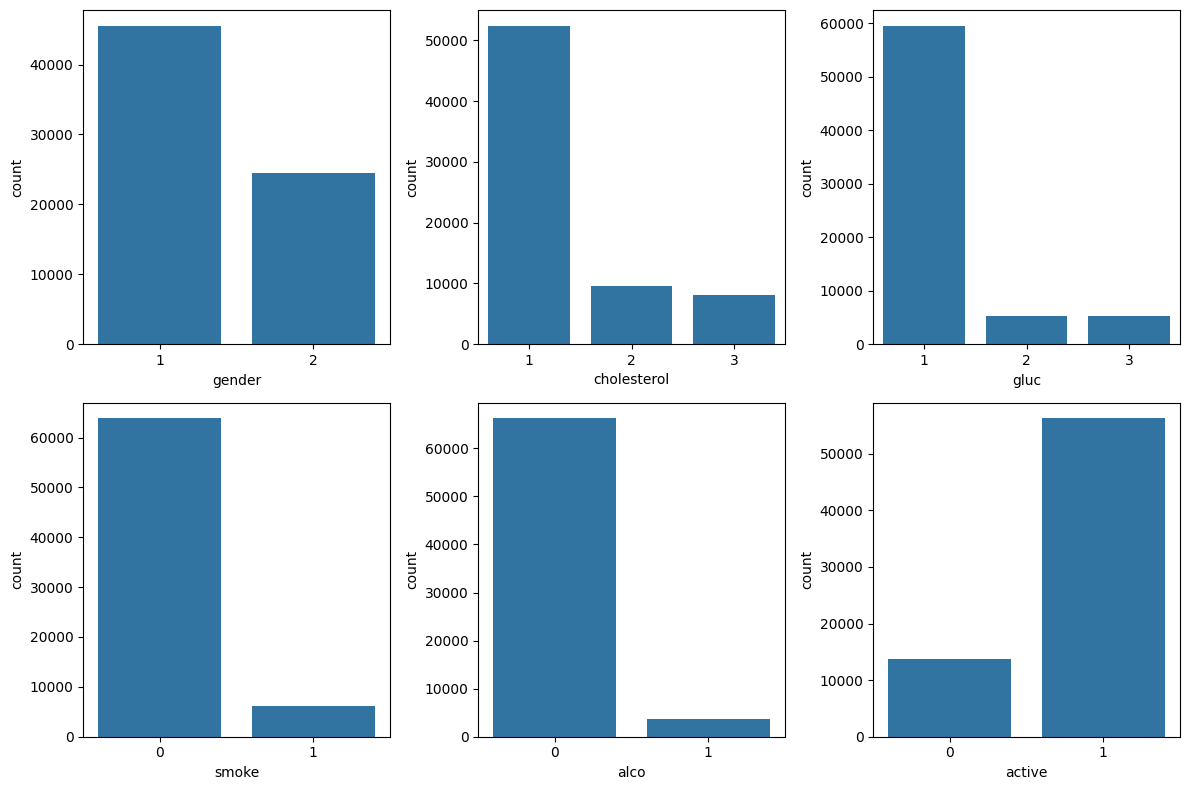

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
plt.tight_layout()
plt.show()

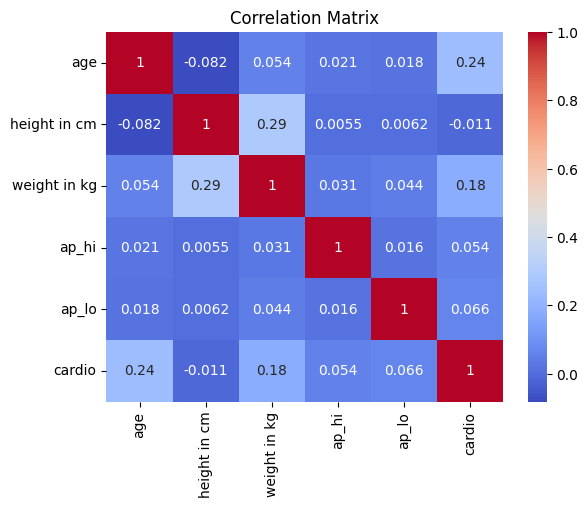

In [ ]:
corr_matrix = df[numerical_cols + ['cardio']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['cardio'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"{col} vs. cardio: p-value = {p:.4f}")

gender vs. cardio: p-value = 0.0325
cholesterol vs. cardio: p-value = 0.0000
gluc vs. cardio: p-value = 0.0000
smoke vs. cardio: p-value = 0.0000
alco vs. cardio: p-value = 0.0545
active vs. cardio: p-value = 0.0000


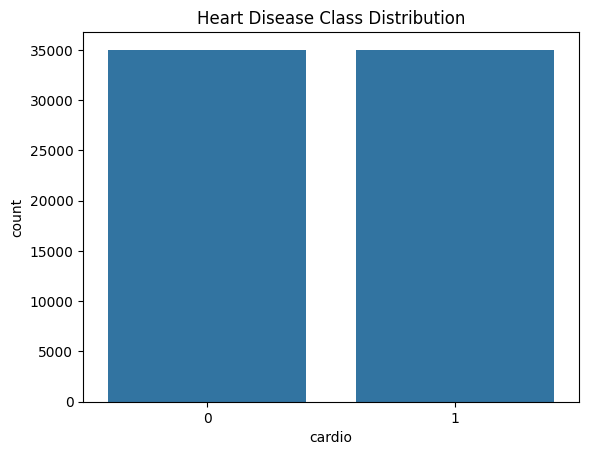

In [ ]:
sns.countplot(data=df, x='cardio')
plt.title("Heart Disease Class Distribution")
plt.show()

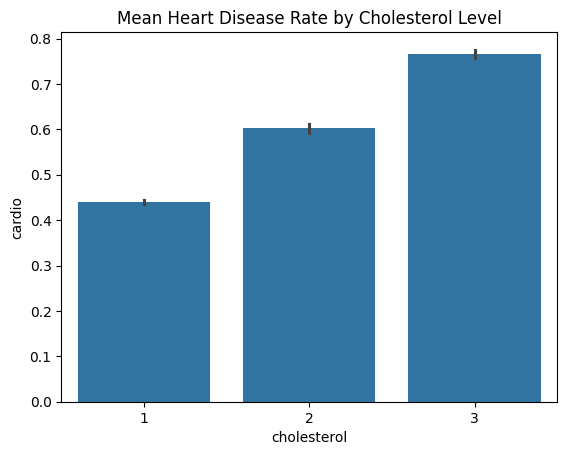

In [ ]:
sns.barplot(data=df, x='cholesterol', y='cardio', estimator=np.mean)
plt.title("Mean Heart Disease Rate by Cholesterol Level")
plt.show()

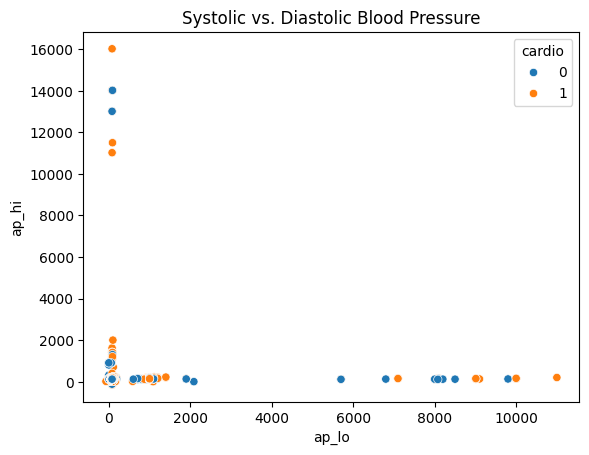

In [ ]:
sns.scatterplot(data=df, x='ap_lo', y='ap_hi', hue='cardio')
plt.title("Systolic vs. Diastolic Blood Pressure")
plt.show()

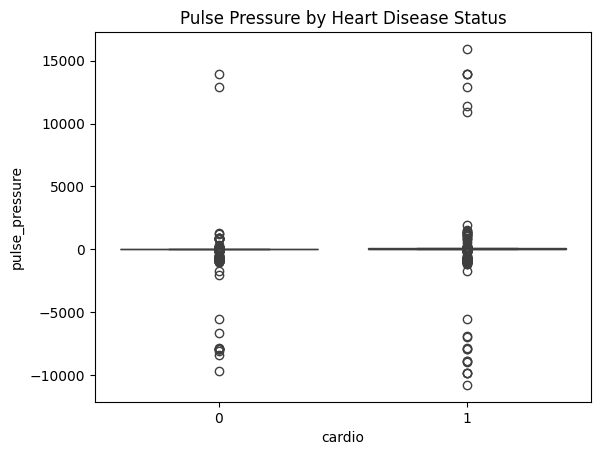

In [ ]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
sns.boxplot(data=df, x='cardio', y='pulse_pressure')
plt.title("Pulse Pressure by Heart Disease Status")
plt.show()

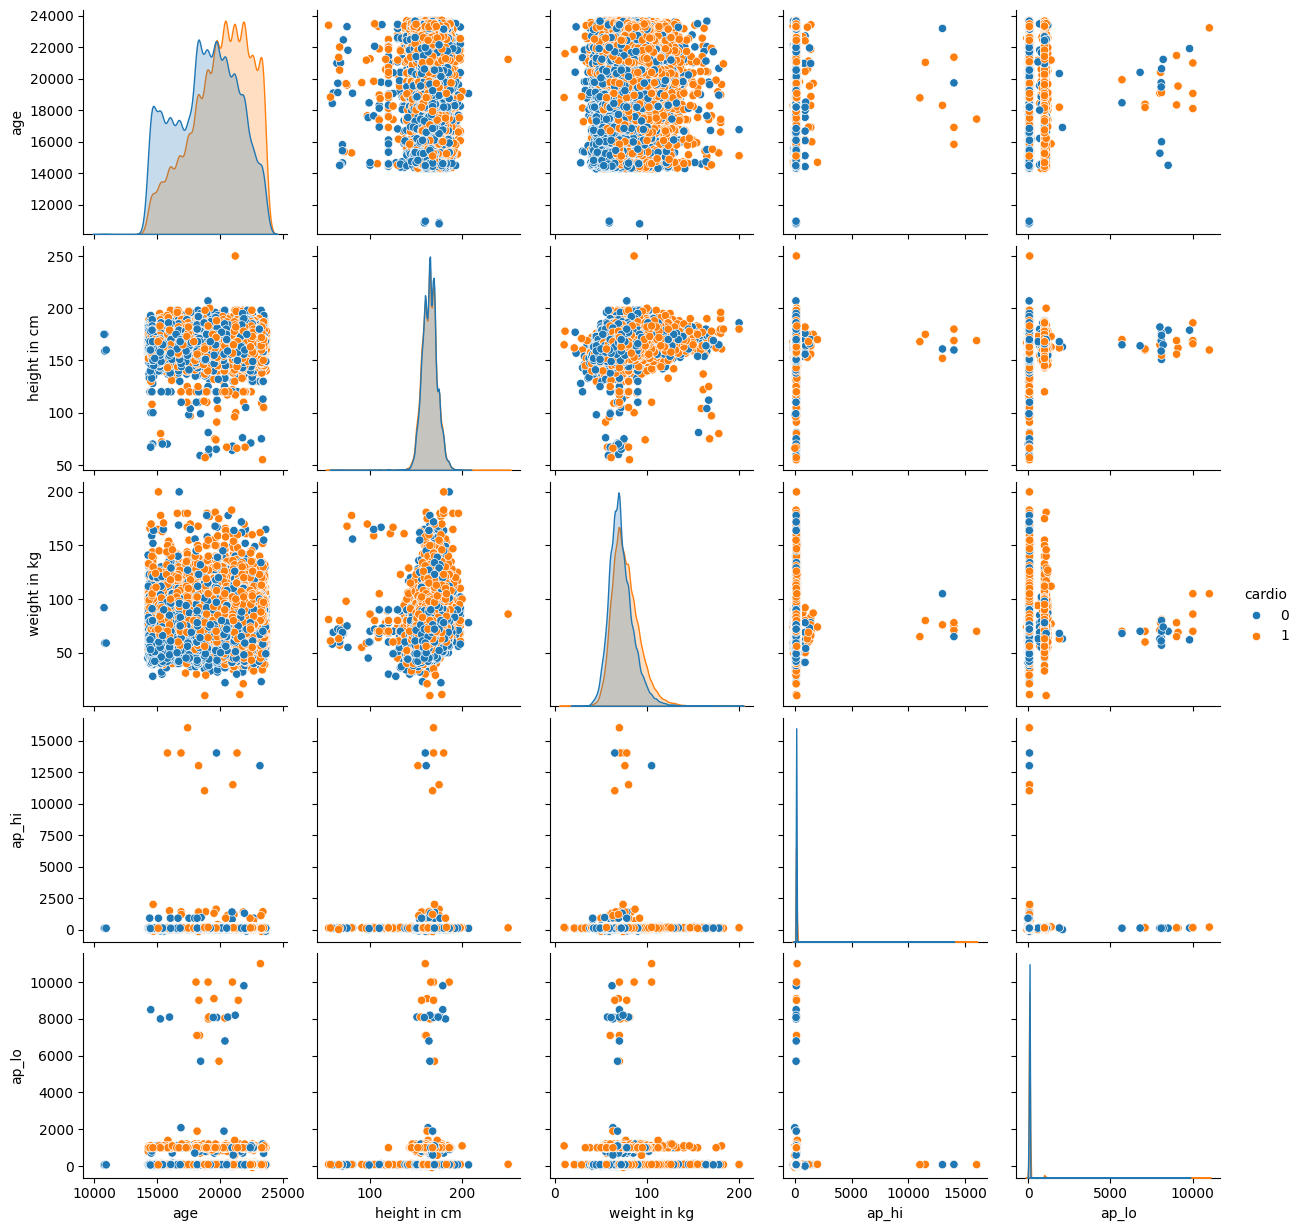

In [ ]:
sns.pairplot(df[numerical_cols + ['cardio']], hue='cardio')
plt.show()

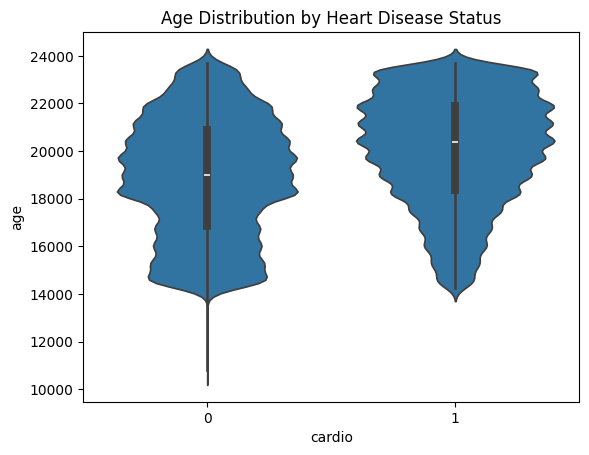

In [ ]:
sns.violinplot(data=df, x='cardio', y='age')
plt.title("Age Distribution by Heart Disease Status")
plt.show()

In [ ]:
print(df.median(numeric_only=True))

id                50001.5
age               19703.0
gender                1.0
height in cm        165.0
weight in kg         72.0
ap_hi               120.0
ap_lo                80.0
cholesterol           1.0
gluc                  1.0
smoke                 0.0
alco                  0.0
active                1.0
cardio                0.0
pulse_pressure       40.0
dtype: float64
